In [1]:
import pandas as pd
import numpy as np
import os
from shutil import copyfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [2]:
lab = pd.read_csv('/home/diegues/Desktop/ProcessedImages/labeled_data.csv')
lab = lab.drop_duplicates(subset=['filename'])
lab = lab.drop(['roll', 'pitch', 'entropy', 'timestamp'], axis=1)
lab

,filename,latitude,longitude,date,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
0,104728_cam-np3_frame5.jpg,41.53283,-8.81532,01/05/18,16.97,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
1,104728_cam-np3_frame9.jpg,41.53283,-8.81531,01/05/18,16.95,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
2,104728_cam-np3_frame50.jpg,41.53277,-8.81526,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
3,104728_cam-np3_frame51.jpg,41.53277,-8.81526,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
4,104728_cam-np3_frame52.jpg,41.53277,-8.81526,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Echinus esculentus,124287.0
6,104728_cam-np3_frame53.jpg,41.53277,-8.81526,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Echinus esculentus,124287.0
8,104728_cam-np3_frame54.jpg,41.53277,-8.81526,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Echinus esculentus,124287.0
10,104728_cam-np3_frame55.jpg,41.53277,-8.81526,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Echinus esculentus,124287.0
11,104728_cam-np3_frame56.jpg,41.53277,-8.81526,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Echinus esculentus,124287.0
13,104728_cam-np3_frame57.jpg,41.53276,-8.81525,01/05/18,15.83,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Echinus esculentus,124287.0


In [3]:
lab2 = pd.read_csv('/home/diegues/Downloads/unlabeled-targets.csv')
lab2 = lab2.dropna(subset=['EunisCode'])
lab2

,filename,date,longitude,latitude,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
1,105317_cam-np3_frame1129.jpg,01/05/18,-8.80903,41.53333,8.40,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
27,105317_cam-np3_frame1393.jpg,01/05/18,-8.80903,41.53333,8.79,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
34,105317_cam-np3_frame1468.jpg,01/05/18,-8.80832,41.53366,18.43,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
38,105317_cam-np3_frame1473.jpg,01/05/18,-8.80832,41.53366,18.43,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
39,105317_cam-np3_frame1474.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
40,105317_cam-np3_frame1479.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
41,105317_cam-np3_frame1480.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
42,105317_cam-np3_frame1482.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
43,105317_cam-np3_frame1483.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
44,105317_cam-np3_frame1484.jpg,01/05/18,-8.80831,41.53366,18.50,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN


In [4]:
global_lab = pd.concat([lab, lab2])
global_lab

,AphiaID,EunisCode,EunisName,date,depth,filename,latitude,level1,level2,level3,level4,level5,level6,longitude,species
0,145188.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.97,104728_cam-np3_frame5.jpg,41.53283,A,A4,A4.1,NaN,NaN,NaN,-8.81532,Mesophyllum lichenoides
1,145188.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.95,104728_cam-np3_frame9.jpg,41.53283,A,A4,A4.1,NaN,NaN,NaN,-8.81531,Mesophyllum lichenoides
2,145188.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.11,104728_cam-np3_frame50.jpg,41.53277,A,A4,A4.1,NaN,NaN,NaN,-8.81526,Mesophyllum lichenoides
3,145188.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.11,104728_cam-np3_frame51.jpg,41.53277,A,A4,A4.1,NaN,NaN,NaN,-8.81526,Mesophyllum lichenoides
4,124287.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.11,104728_cam-np3_frame52.jpg,41.53277,A,A4,A4.1,NaN,NaN,NaN,-8.81526,Echinus esculentus
6,124287.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.11,104728_cam-np3_frame53.jpg,41.53277,A,A4,A4.1,NaN,NaN,NaN,-8.81526,Echinus esculentus
8,124287.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.11,104728_cam-np3_frame54.jpg,41.53277,A,A4,A4.1,NaN,NaN,NaN,-8.81526,Echinus esculentus
10,124287.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.11,104728_cam-np3_frame55.jpg,41.53277,A,A4,A4.1,NaN,NaN,NaN,-8.81526,Echinus esculentus
11,124287.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,16.11,104728_cam-np3_frame56.jpg,41.53277,A,A4,A4.1,NaN,NaN,NaN,-8.81526,Echinus esculentus
13,124287.0,A4.1,Atlantic and Mediterranean high energy circali...,01/05/18,15.83,104728_cam-np3_frame57.jpg,41.53276,A,A4,A4.1,NaN,NaN,NaN,-8.81525,Echinus esculentus


In [11]:
#os.mkdir('/home/diegues/Desktop/ProcessedImages/unlabeled/')
i = 0
for f in unlab.index:
    if os.path.exists('/home/diegues/Desktop/ProcessedImages/unknown/' + f):
        i += 1
        copyfile('/home/diegues/Desktop/ProcessedImages/unknown/' + f, '/home/diegues/Desktop/ProcessedImages/unlabeled/' + f)
if i == len(unlab.index):
    print('Success')

Success


In [13]:
unlab.to_csv('/home/diegues/Desktop/ProcessedImages/unlabeled/unlabeled-target.csv')

In [14]:
X_unlab = pd.read_csv('/home/diegues/Desktop/ProcessedImages/unknown/unknown.csv')
X_unlab = X_unlab.drop(lab.index)
X_unlab.describe()

,timestamp,latitude,longitude,roll,pitch,altitude,depth,entropy
count,3.951000e+03,3951.000000,3951.000000,3951.000000,3951.000000,3951.0,3951.000000,3951.000000
mean,1.525180e+09,41.532674,-8.811003,-2.374601,-21.466322,0.0,12.259848,21.876062
std,4.165158e+03,0.000967,0.002226,4.261344,4.767545,0.0,3.343455,0.062678
min,1.525172e+09,41.530050,-8.816020,-27.810000,-31.390000,0.0,5.020000,21.334483
25%,1.525175e+09,41.531970,-8.812380,-3.200000,-24.835000,0.0,9.610000,21.856356
50%,1.525180e+09,41.533160,-8.810890,-1.310000,-22.340000,0.0,11.930000,21.893265
75%,1.525184e+09,41.533290,-8.809520,0.060000,-19.080000,0.0,14.980000,21.917186
max,1.525184e+09,41.534150,-8.805860,30.910000,6.100000,0.0,19.690000,21.936992


In [16]:
X_unlab = X_unlab.set_index('filename')


In [17]:
X_unlab.head()


,timestamp,latitude,longitude,roll,pitch,altitude,depth,entropy,date
filename,,,,,,,,,
132143_forcadinho-np3_frame1503.jpg,1.525183e+09,41.53322,-8.80922,0.12,-28.35,0.0,8.92,21.804145,01/05/18
132143_forcadinho-np3_frame1504.jpg,1.525183e+09,41.53322,-8.80922,0.12,-28.35,0.0,8.92,21.813782,01/05/18
132143_forcadinho-np3_frame1505.jpg,1.525183e+09,41.53322,-8.80922,0.12,-28.35,0.0,8.92,21.812570,01/05/18
132143_forcadinho-np3_frame1506.jpg,1.525183e+09,41.53322,-8.80922,0.12,-28.35,0.0,8.92,21.839201,01/05/18
132143_forcadinho-np3_frame1507.jpg,1.525183e+09,41.53322,-8.80922,0.12,-28.35,0.0,8.92,21.844838,01/05/18


In [21]:
X_unlab.to_csv('/home/diegues/Desktop/ProcessedImages/unlabeled/unlabeled.csv')

# Tags


In [2]:
annotated_unlabeled = pd.read_csv('/home/diegues/Downloads/unlabeled-targets.csv')
annotated_unlabeled.head()


,filename,date,longitude,latitude,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
0,105317_cam-np3_frame1118.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105317_cam-np3_frame1129.jpg,01/05/18,-8.80903,41.53333,8.4,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
2,105317_cam-np3_frame1136.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,105317_cam-np3_frame1342.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105317_cam-np3_frame1343.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
annotated_unlabeled = annotated_unlabeled.set_index('filename')

In [4]:
all_labels = annotated_unlabeled.dropna(subset=['EunisCode'])
all_labels

,date,longitude,latitude,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
filename,,,,,,,,,,,,,,
105317_cam-np3_frame1129.jpg,01/05/18,-8.80903,41.53333,8.40,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1393.jpg,01/05/18,-8.80903,41.53333,8.79,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1468.jpg,01/05/18,-8.80832,41.53366,18.43,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1473.jpg,01/05/18,-8.80832,41.53366,18.43,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1474.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1479.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1480.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1482.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1483.jpg,01/05/18,-8.80831,41.53366,18.44,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN


In [5]:
all_labels[all_labels.level2 == 'A5']

,date,longitude,latitude,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
filename,,,,,,,,,,,,,,
105317_cam-np3_frame846.jpg,01/05/18,-8.80903,41.53333,8.64,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame847.jpg,01/05/18,-8.80903,41.53333,8.64,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame859.jpg,01/05/18,-8.80903,41.53333,8.64,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame860.jpg,01/05/18,-8.80903,41.53333,8.64,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame861.jpg,01/05/18,-8.80903,41.53333,8.64,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
113610_cam_survey_1_frame1548.jpg,01/05/18,-8.81176,41.53266,12.03,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
113610_cam_survey_1_frame1549.jpg,01/05/18,-8.81176,41.53266,12.03,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
113610_cam_survey_1_frame1550.jpg,01/05/18,-8.81176,41.53266,12.03,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN
113610_cam_survey_1_frame1552.jpg,01/05/18,-8.81176,41.53266,12.03,A5.2,NaN,A,A5,A5.2,NaN,NaN,NaN,NaN,NaN


In [6]:
sampled = pd.read_csv('/home/diegues/Desktop/ProcessedImages/sampled_data.csv')

In [7]:
second_train = pd.concat([sampled.set_index('filename'), all_labels[all_labels.level2 == 'A5']])
second_train = second_train[~second_train.index.duplicated(keep='first')]
len(second_train)

754

In [5]:
global_lab.level3.value_counts()


A4.1    1403
A3.1     538
A5.1     213
A4.7     174
A5.2     123
A3.7      91
A5.4      64
Name: level3, dtype: int64

In [80]:
for f in global_lab.filename:
    if(os.path.exists('/home/diegues/Desktop/ProcessedImages/LabeledData/' + f)):
        continue
    copyfile('/home/diegues/Desktop/ProcessedImages/unlabeled/' + f, '/home/diegues/Desktop/ProcessedImages/LabeledData/' + f)

In [42]:
for f in sampled.set_index('filename').index:
    copyfile('/home/diegues/Desktop/ProcessedImages/LabeledData/' + f, '/home/diegues/Desktop/ProcessedImages/second_train/' + f)

In [6]:
def createDirectoryEnvironment(train_data, train_targets, val_data, val_targets, path):
    trainpath = path + 'train/'
    valpath = path + 'validation/'
    if(os.listdir() == 2):
        return trainpath,valpath
    if(not os.path.exists(trainpath)):
        os.mkdir(trainpath)
    if(not os.path.exists(valpath)):
        os.mkdir(valpath)
        
    classes = train_targets.columns.append(val_targets.columns).drop_duplicates()  
    for c in classes:
        train_class = trainpath + c + '/'
        val_class = valpath + c + '/'
        if(not os.path.exists(train_class)):
            os.mkdir(train_class)
        if(not os.path.exists(val_class)):
            os.mkdir(val_class)
        
    for f in train_data.values:
        #print(path + f,trainpath + train_targets.loc[f].idxmax(axis = 1) + '/' + f)
        copyfile(path + f, trainpath + train_targets.loc[f].idxmax(axis = 1) + '/' + f)
    for f in val_data.values:
        #print(path + f, valpath + val_targets.loc[f].idxmax(axis = 1) + '/' + f)
        copyfile(path + f, valpath + val_targets.loc[f].idxmax(axis = 1) + '/' + f)
    
    return trainpath, valpath

In [7]:
global_lab = global_lab.set_index('filename')
targets = global_lab['level3'].replace(['A3.1', 'A4.1'], 'A3.1-A4.1').replace(['A3.7', 'A4.7'], 'A3.7-A4.7')

# one-hot encoding
Y = pd.get_dummies(targets)

# dealing with NaNs
#second_train = second_train.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4', 
 #                 'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
  #                'date', 'timestamp', 'species'],
   #              axis = 1)

X = global_lab.index



# tts
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state=47)

images_path = '/home/diegues/Desktop/ProcessedImages/LabeledData/'


In [86]:
test_Y

,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
filename,,,,,
113610_cam_survey_1_frame2672.jpg,1,0,0,0,0
105317_cam-np3_frame1476.jpg,1,0,0,0,0
132143_forcadinho-np3_frame3006.jpg,1,0,0,0,0
132143_forcadinho-np3_frame3407.jpg,0,0,1,0,0
113610_cam_survey_1_frame138.jpg,1,0,0,0,0
132143_forcadinho-np3_frame2479.jpg,0,0,0,1,0
105317_cam-np3_frame1765.jpg,1,0,0,0,0
104728_cam-np3_frame66.jpg,1,0,0,0,0
113610_cam_survey_1_frame161.jpg,1,0,0,0,0


In [88]:
train_dir, val_dir = createDirectoryEnvironment(train_X, train_Y, test_X, test_Y, images_path)

In [8]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

/home/diegues/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
vgg = VGG16(weights='imagenet')
fc1 = vgg.layers[-3]
fc2 = vgg.layers[-2]
predictions = Dense(5, activation='softmax', name='predictions')


dropout1 = Dropout(0.5)
dropout2 = Dropout(0.5)

x = dropout1(fc1.output)
x = fc2(x)
x = dropout2(x)
predictors = predictions(x)

eunis_classifier_w_dropout = Model(input=vgg.input, output=predictors)
eunis_classifier_w_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/diegues/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  from ipykernel import kernelapp as app


In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=180,
      vertical_flip=True,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_batchsize = 1
val_batchsize = 1
 
train_generator = train_datagen.flow_from_directory(
        '/home/diegues/Desktop/ProcessedImages/LabeledData/train/',
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')#, 
        #save_to_dir='/home/diegues/aug/', save_prefix='aug')
    
validation_generator = validation_datagen.flow_from_directory(
        '/home/diegues/Desktop/ProcessedImages/LabeledData/validation/',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1824 images belonging to 5 classes.
Found 782 images belonging to 5 classes.


In [16]:
sgd_optimizer = SGD(lr=0.01)
eunis_classifier_w_dropout.compile(loss='categorical_crossentropy',
                        optimizer=sgd_optimizer, 
                        metrics=['acc'])
tensorboard = TensorBoard(log_dir='./Graph/all_labels', histogram_freq=0, write_graph=True, write_images=True)
best_checkpoint = ModelCheckpoint('./weights/all_labels.h5', monitor='val_acc', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_acc', patience=10, verbose=1)
reducer = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, verbose=1, min_lr=1e-7)

In [12]:
history_all = eunis_classifier_w_dropout.fit_generator(train_generator, 
                                         steps_per_epoch=1824,
                                         epochs=500,
                                         validation_data=validation_generator,
                                         validation_steps = 782,
                                         callbacks=[tensorboard, best_checkpoint, earlystop, reducer]
                                        )

Epoch 1/500
1824/1824 [==============================] - 316s 173ms/step - loss: 4.1202 - acc: 0.7440 - val_loss: 4.1017 - val_acc: 0.7455

Epoch 00001: val_acc improved from -inf to 0.74552, saving model to ./weights/all_labels.h5
Epoch 2/500
1824/1824 [==============================] - 312s 171ms/step - loss: 4.1179 - acc: 0.7445 - val_loss: 4.1017 - val_acc: 0.7455

Epoch 00002: val_acc did not improve from 0.74552
Epoch 3/500
1824/1824 [==============================] - 313s 172ms/step - loss: 4.1179 - acc: 0.7445 - val_loss: 4.1017 - val_acc: 0.7455

Epoch 00003: val_acc did not improve from 0.74552
Epoch 4/500
1824/1824 [==============================] - 313s 172ms/step - loss: 4.1179 - acc: 0.7445 - val_loss: 4.1017 - val_acc: 0.7455

Epoch 00004: val_acc did not improve from 0.74552

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 5/500
1824/1824 [==============================] - 313s 172ms/step - loss: 4.1179 - acc: 0.7445 - val_loss: 4.10

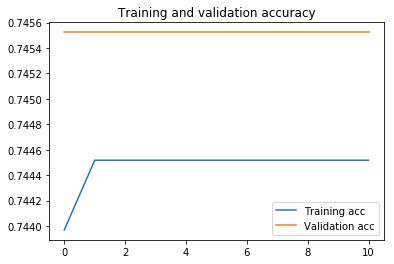

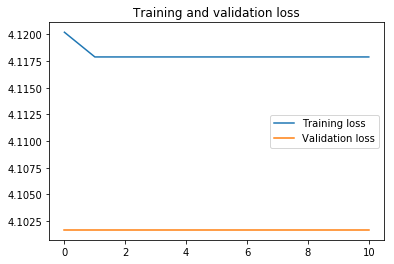

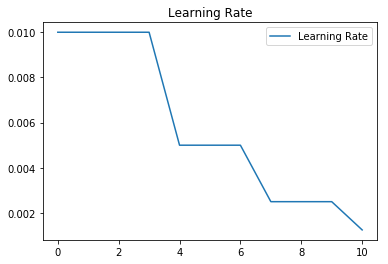

In [13]:
drop_acc = history_all.history['acc']
drop_val_acc = history_all.history['val_acc']
drop_loss = history_all.history['loss']
drop_val_loss = history_all.history['val_loss']
drop_lr = history_all.history['lr']
 
drop_epochs = range(len(drop_acc))
 
plt.plot(drop_epochs, drop_acc, label='Training acc')
plt.plot(drop_epochs, drop_val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('train_val_acc_all.jpg')

plt.figure()
 
plt.plot(drop_epochs, drop_loss, label='Training loss')
plt.plot(drop_epochs, drop_val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('train_val_loss_all.jpg')
plt.show()

plt.figure()
 
plt.plot(drop_epochs, drop_lr, label='Learning Rate')
plt.title('Learning Rate')
plt.legend()
plt.savefig('learning_rate_all.jpg')
plt.show()

In [15]:
eunis_classifier_w_dropout.load_weights('weights/all_labels.h5')

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/home/diegues/Desktop/ProcessedImages/test',
        target_size=(224, 224),
        batch_size=1,
        class_mode=None,
        shuffle=False)

Found 751 images belonging to 1 classes.


In [18]:
_2nd_try_preds = eunis_classifier_w_dropout.predict_generator(test_generator, steps=751, verbose=1)

751/751 [==============================] - 20s 27ms/step


In [19]:
test_data = pd.read_csv('/home/diegues/Desktop/ProcessedImages/unknown2.csv')
test_data.head()

,filename,timestamp,latitude,longitude,roll,pitch,altitude,depth,entropy,date
0,132143_forcadinho-np3_frame3300.jpg,1.525184e+09,41.53329,-8.81016,-0.62,-27.17,0,10.52,21.856527,01/05/18
1,132143_forcadinho-np3_frame3830.jpg,1.525184e+09,41.53266,-8.81176,0.43,-27.64,0,11.99,21.816218,01/05/18
2,132143_forcadinho-np3_frame1822.jpg,1.525183e+09,41.53376,-8.80811,-3.96,-21.16,0,17.73,21.932676,01/05/18
3,125355_forcadinho-np3_frame1559.jpg,1.525180e+09,41.53163,-8.81047,-10.73,-16.07,0,13.34,21.750740,01/05/18
4,113610_cam_survey_1_frame2648.jpg,1.525176e+09,41.53337,-8.80586,-23.16,-19.00,0,9.28,21.928182,01/05/18


In [20]:
_2nd_try_preds = pd.DataFrame(_2nd_try_preds).set_index(test_data.filename)
_2nd_try_preds.columns = ['A3.1-A4.1', 'A3.7-A4.7', 'A5.1', 'A5.2', 'A5.4']
#cnn_w_drop_preds['level3'] = cnn_w_drop_preds.idxmax(axis=1)
_2nd_try_preds.head()

,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
filename,,,,,
132143_forcadinho-np3_frame3300.jpg,1.0,0.0,0.0,1.497142e-35,2.155224e-38
132143_forcadinho-np3_frame3830.jpg,1.0,0.0,0.0,2.009130e-35,2.906528e-38
132143_forcadinho-np3_frame1822.jpg,1.0,0.0,0.0,1.594527e-35,2.297569e-38
125355_forcadinho-np3_frame1559.jpg,1.0,0.0,0.0,4.052627e-36,0.000000e+00
113610_cam_survey_1_frame2648.jpg,1.0,0.0,0.0,1.514865e-36,0.000000e+00


In [21]:
res = pd.DataFrame(_2nd_try_preds.columns[np.argsort(-_2nd_try_preds.values, axis = 1)], index=_2nd_try_preds.index)
_2nd_try_preds['first_level3'] = res[0]
_2nd_try_preds['second_level3'] = res[1]
_2nd_try_preds

,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4,first_level3,second_level3
filename,,,,,,,
132143_forcadinho-np3_frame3300.jpg,1.0,0.0,0.0,1.497142e-35,2.155224e-38,A3.1-A4.1,A5.2
132143_forcadinho-np3_frame3830.jpg,1.0,0.0,0.0,2.009130e-35,2.906528e-38,A3.1-A4.1,A5.2
132143_forcadinho-np3_frame1822.jpg,1.0,0.0,0.0,1.594527e-35,2.297569e-38,A3.1-A4.1,A5.2
125355_forcadinho-np3_frame1559.jpg,1.0,0.0,0.0,4.052627e-36,0.000000e+00,A3.1-A4.1,A5.2
113610_cam_survey_1_frame2648.jpg,1.0,0.0,0.0,1.514865e-36,0.000000e+00,A3.1-A4.1,A5.2
132143_forcadinho-np3_frame135.jpg,1.0,0.0,0.0,2.461251e-36,0.000000e+00,A3.1-A4.1,A5.2
125355_forcadinho-np3_frame54.jpg,1.0,0.0,0.0,1.610917e-36,0.000000e+00,A3.1-A4.1,A5.2
132143_forcadinho-np3_frame4230.jpg,1.0,0.0,0.0,2.843450e-36,0.000000e+00,A3.1-A4.1,A5.2
132143_forcadinho-np3_frame3975.jpg,1.0,0.0,0.0,1.976977e-36,0.000000e+00,A3.1-A4.1,A5.2


In [22]:
_2nd_try_preds['first_level2'] = [e[:2] for e in _2nd_try_preds.first_level3.values[:]]
_2nd_try_preds['second_level2'] = [e[:2] for e in _2nd_try_preds.second_level3.values[:]]
_2nd_try_preds.head()

,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4,first_level3,second_level3,first_level2,second_level2
filename,,,,,,,,,
132143_forcadinho-np3_frame3300.jpg,1.0,0.0,0.0,1.497142e-35,2.155224e-38,A3.1-A4.1,A5.2,A3,A5
132143_forcadinho-np3_frame3830.jpg,1.0,0.0,0.0,2.009130e-35,2.906528e-38,A3.1-A4.1,A5.2,A3,A5
132143_forcadinho-np3_frame1822.jpg,1.0,0.0,0.0,1.594527e-35,2.297569e-38,A3.1-A4.1,A5.2,A3,A5
125355_forcadinho-np3_frame1559.jpg,1.0,0.0,0.0,4.052627e-36,0.000000e+00,A3.1-A4.1,A5.2,A3,A5
113610_cam_survey_1_frame2648.jpg,1.0,0.0,0.0,1.514865e-36,0.000000e+00,A3.1-A4.1,A5.2,A3,A5


In [23]:
ground_truth = pd.read_csv('/home/diegues/Downloads/unknown2-targets.csv')
ground_truth.index = ground_truth.filename
ground_truth.head()

,filename,date,longitude,latitude,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
filename,,,,,,,,,,,,,,,
105317_cam-np3_frame1347.jpg,105317_cam-np3_frame1347.jpg,01/05/18,-8.81545,41.53153,17.61,A3.7,NaN,A,A3,A3.7,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1352.jpg,105317_cam-np3_frame1352.jpg,01/05/18,-8.81545,41.53153,17.61,A3.7,NaN,A,A3,A3.7,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1390.jpg,105317_cam-np3_frame1390.jpg,01/05/18,-8.81299,41.53317,6.06,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1468.jpg,105317_cam-np3_frame1468.jpg,01/05/18,-8.81573,41.53185,15.50,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN
105317_cam-np3_frame1473.jpg,105317_cam-np3_frame1473.jpg,01/05/18,-8.81139,41.53005,18.55,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,NaN,NaN


In [24]:
res_preds = pd.concat([_2nd_try_preds[['first_level3', 'second_level3', 'first_level2', 'second_level2']], ground_truth[['level3', 'level2']]], join='inner', axis=1)
res_preds

,first_level3,second_level3,first_level2,second_level2,level3,level2
filename,,,,,,
132143_forcadinho-np3_frame3300.jpg,A3.1-A4.1,A5.2,A3,A5,A3.1,A3
132143_forcadinho-np3_frame3830.jpg,A3.1-A4.1,A5.2,A3,A5,A3.1,A3
132143_forcadinho-np3_frame1822.jpg,A3.1-A4.1,A5.2,A3,A5,A5.1,A5
125355_forcadinho-np3_frame1559.jpg,A3.1-A4.1,A5.2,A3,A5,A3.1,A3
113610_cam_survey_1_frame2648.jpg,A3.1-A4.1,A5.2,A3,A5,A3.1,A3
132143_forcadinho-np3_frame135.jpg,A3.1-A4.1,A5.2,A3,A5,A3.1,A3
125355_forcadinho-np3_frame54.jpg,A3.1-A4.1,A5.2,A3,A5,A5.4,A5
132143_forcadinho-np3_frame4230.jpg,A3.1-A4.1,A5.2,A3,A5,A3.7,A3
132143_forcadinho-np3_frame3975.jpg,A3.1-A4.1,A5.2,A3,A5,A3.1,A3


In [25]:
res_preds[['first_level2', 'second_level2']] = res_preds[['first_level2', 'second_level2']].replace(['A3', 'A4'], 'A3-A4')
res_preds

,first_level3,second_level3,first_level2,second_level2,level3,level2
filename,,,,,,
132143_forcadinho-np3_frame3300.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.1,A3
132143_forcadinho-np3_frame3830.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.1,A3
132143_forcadinho-np3_frame1822.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A5.1,A5
125355_forcadinho-np3_frame1559.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.1,A3
113610_cam_survey_1_frame2648.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.1,A3
132143_forcadinho-np3_frame135.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.1,A3
125355_forcadinho-np3_frame54.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A5.4,A5
132143_forcadinho-np3_frame4230.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.7,A3
132143_forcadinho-np3_frame3975.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.1,A3


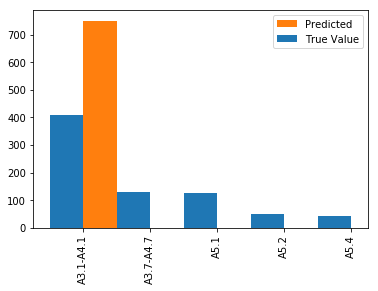

In [26]:
fig = plt.figure()

ax = fig.add_subplot(111) 
res_preds.first_level3.value_counts().plot.bar(color='C1', position=0, label='Predicted')
res_preds.level3.replace(['A3.1', 'A4.1'], 'A3.1-A4.1').replace(['A3.7', 'A4.7'], 'A3.7-A4.7').value_counts().plot.bar(color='C0', position=1, label='True Value')
plt.legend()
plt.savefig('predicted_vs_true2nd.jpg')
plt.show()

In [27]:
res_preds.level3.value_counts()

A3.1    378
A5.1    125
A3.7    105
A5.2     49
A5.4     41
A4.1     30
A4.7     23
Name: level3, dtype: int64

In [28]:
y3_true = res_preds.level3.replace(['A3.1', 'A4.1'], 'A3.1-A4.1').replace(['A3.7', 'A4.7'], 'A3.7-A4.7')
y3_pred = res_preds.first_level3
print(classification_report(y3_true, y3_pred, labels=['A3.1-A4.1','A3.7-A4.7','A5.1','A5.2','A5.4']))

             precision    recall  f1-score   support

  A3.1-A4.1       0.54      1.00      0.70       408
  A3.7-A4.7       0.00      0.00      0.00       128
       A5.1       0.00      0.00      0.00       125
       A5.2       0.00      0.00      0.00        49
       A5.4       0.00      0.00      0.00        41

avg / total       0.30      0.54      0.38       751



/home/diegues/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
accuracy_score(y3_true, y3_pred)

0.5432756324900133

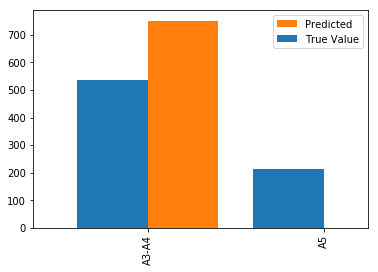

In [30]:
fig = plt.figure()

ax = fig.add_subplot(111) 
res_preds.first_level2.value_counts().plot.bar(color='C1', position=0, label='Predicted', width=.4)
res_preds.level2.replace(['A3', 'A4'], 'A3-A4').value_counts().plot.bar(color='C0', position=1, label='True Value', width=0.4)
plt.legend()
plt.savefig('predicted_vs_true_lvl2_2nd.jpg')
plt.show()

In [31]:
y2_true = res_preds.level2.replace(['A3', 'A4'],'A3-A4')
y2_pred = res_preds.first_level2
print(classification_report(y2_true, y2_pred, labels=['A3-A4','A5']))

             precision    recall  f1-score   support

      A3-A4       0.71      1.00      0.83       536
         A5       0.00      0.00      0.00       215

avg / total       0.51      0.71      0.59       751



/home/diegues/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
accuracy_score(y2_true, y2_pred)

0.7137150466045273

In [33]:
failed_lvl3 = res_preds[res_preds['first_level3'] != res_preds['level3'].replace(['A3.1', 'A4.1'],'A3.1-A4.1').replace(['A3.7', 'A4.7'],'A3.7-A4.7')]
failed_lvl3.head()

,first_level3,second_level3,first_level2,second_level2,level3,level2
filename,,,,,,
132143_forcadinho-np3_frame1822.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A5.1,A5
125355_forcadinho-np3_frame54.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A5.4,A5
132143_forcadinho-np3_frame4230.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.7,A3
113610_cam_survey_1_frame511.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A3.7,A3
125355_forcadinho-np3_frame454.jpg,A3.1-A4.1,A5.2,A3-A4,A5,A5.2,A5


In [34]:
df_fail3 = pd.concat([pd.get_dummies(failed_lvl3.first_level3),failed_lvl3.replace(['A3.1', 'A4.1'],'A3.1-A4.1').replace(['A3.7', 'A4.7'],'A3.7-A4.7').level3], axis=1).groupby('level3').sum()


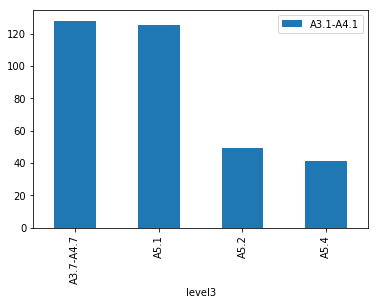

In [35]:
df_fail3.plot.bar()
plt.legend()
plt.savefig('predicted_vs_true_per_class2nd.jpg')
plt.show()